# Maxwell-Boltzmann Distributions

Let's take a box which has some atoms inside. The atoms are in the vapour phase, and we can consider it an ideal gas. In this case the Maxwell-Boltzmann distribution tells us how fast the atoms are moving. The speed distribution obeys the relationship,

$$ f_i(v) = A e^{{-\beta E_i(v_i)}}$$

or, if we assume that the kinetic energy dominates $E_i = \frac{1}{2}mv_i^2$ and $\beta = \frac{1}{k_B T}$, where $k_B=1.38064852 \times 10^{-23} m^2 s^{-2} kg\,  K^{-1}$ and the distribution is normalized to unit area, then:

$$ f_v(v) = \left(\frac{m}{2\pi k_B T}\right)^{3/2} \; 4\pi v_i^2 \; \exp\left({\frac{-mv_i^2}{2k_B T}}\right) $$

that is, the fraction of atoms $f_v$ with velocity $v$, $k_B$ is Boltzmann's constant, $T$ is the thermodynamic temperature (in Kelvin) and $m$ is the mass of the atoms. 

Let's build up what that distribution should look like, and then change the temperature!

## Function for the distribution

How should this be constructed? What should it depend on?

In [9]:
def MBspeed(v,m,t):
    kB=1.38e-23
    fv=((m / (2 * np.pi * kB * T))**1.5) * np.pi * 4 * (v**2) * np.exp( -1*(m * v**2) / (2 * kB * t))
    
    """ Maxwell-Boltzmann speed distribution for speeds """
    return fv

## Plotting the distribution

Setup the libraries as usual.

In [13]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Set some constants that we may want

In [5]:
amu  = 1.66e-27
mass = 85*amu

For the actual plot, we'll want to:
1. setup the $x$-axis (which, in this case, is velocity, $v$) as an array
1. vary the temperature across a few values
1. vary the mass across a few values
1. plot each on the same axes

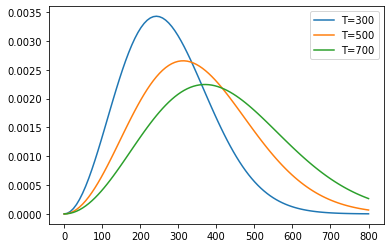

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

v = np.linspace(0,800,100)
temps= [300, 500, 700]

for T in temps: 
    plt.plot(v,MBspeed(v,mass,T), label="T=%d" % T)
    plt.legend(loc=0)

    


# Naive python accept / reject

This is meant to be an easily readable implementation of the accept / reject algorithm. It's easy to understand not very fast.


In [19]:
Temp=300
def accept_reject(N):
    """ accept-reject method for randomly sampling a distribution """
    xmin = 0
    xmax = 800

    n_accept=0
    x_list = [] 
    while n_accept < N:
        v = (xmax-xmin)*np.random.rand() + xmin
        y = np.random.rand()
        if y < MBspeed(v,mass,Temp):
            n_accept += 1
            x_list.append(v)
    return x_list

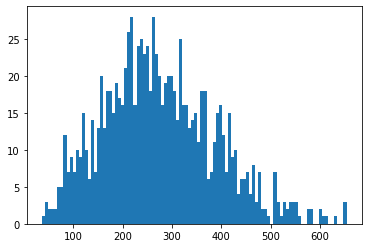

In [20]:
x = accept_reject(1000)
bins, edges, patches = plt.hist(x, bins=100)
plt.show()